# Benchmark at the pocket level

In [1]:
from benchmark_lib import *

def plot_precision_data_TUNED(df, figsize=(6, 6), dpi=150, xlim=(-1, 500), ylim=(0, 101), methods="ALL", out=None, error_bar_params=(0, 100, 500)):
    plt.figure(figsize=figsize, dpi=dpi)
    if methods != "ALL":
        df = df.query('origin in @methods')
    
    start, step, end = error_bar_params
    
    for method in methods:
        subset = df.query('origin == @method')
        plt.plot(
            subset['total'], subset['precision'], label=method, color=palette[method], lw=1.5,
            linestyle = linestyles_dict2[method]
        )
        
        error_indices = np.arange(start, min(end, len(subset)), step)
        plt.errorbar(
            subset['total'].iloc[error_indices], 
            subset['precision'].iloc[error_indices], 
            yerr=[subset['precision'].iloc[error_indices] - subset['lower_precision'].iloc[error_indices],
                  subset['upper_precision'].iloc[error_indices] - subset['precision'].iloc[error_indices]],
            fmt='o', capsize=3, color=palette[method], alpha=1
        )

    plt.xlabel('# Predictions')
    plt.ylabel('Precision (%)')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    if out is not None:
        plt.savefig(out)
    plt.legend().set_visible(False)
    plt.show()

def add_precision_ci(df, conf_level=0.95):
    # Calculate the Wilson score interval
    alpha = 1 - conf_level
    df['lower_ci'], df['upper_ci'] = proportion_confint(df['cumsum_TP'], df['total'], alpha=alpha, method='wilson')
    # Convert CI for precision
    df['lower_precision'] = 100 * df['lower_ci']
    df['upper_precision'] = 100 * df['upper_ci']
    return df

def shuffle_group(df):
    if df['origin'].iloc[0] in origins_to_shuffle:
        return df.sample(frac=1, random_state=seed)
    else:
        return df

## Reading data

In [2]:
combined_df_filt = pd.read_pickle("./results/ALL_PREDS_COMBINED_RIGHT_EXTENDED_DEF.pkl").sort_values(["origin", "rep_chain", "ID"], ascending = [False, True, True]).reset_index(drop = True)

i_cols0 = ["origin", "rep_chain", "ID", "centre", "n_aas", "RoG", "SASA", "VOL", "up_aas", "aas"]
i_cols1 = i_cols0 + ["RANK", "score"]
i_cols2 = i_cols0 + ["RANK", "prob"]
i_cols3 = i_cols0 + ["RANK", "n_points"]
i_cols4 = i_cols0 + ["ion_prop", "cluster_dist", "monomer_prop"]

LIGYSIS = combined_df_filt.query('origin == "LIGYSIS"')[i_cols4].copy().reset_index(drop = True)
VN_EGNN = combined_df_filt.query('origin == "VN-EGNN"')[i_cols1].copy().reset_index(drop = True)
IFSP = combined_df_filt.query('origin == "IF-SitePred"')[i_cols3].copy().reset_index(drop = True)
GrASP = combined_df_filt.query('origin == "GrASP"')[i_cols1].copy().reset_index(drop = True)

PUResNet_prank_cons = combined_df_filt.query('origin == "PUResNet+PRANK+Cons"')[i_cols1].copy().reset_index(drop = True)
PUResNet_prank = combined_df_filt.query('origin == "PUResNet+PRANK"')[i_cols1].copy().reset_index(drop = True)
PUResNet = combined_df_filt.query('origin == "PUResNet"')[i_cols1].copy().reset_index(drop = True)

DeepPocket_segmented = combined_df_filt.query('origin == "DeepPocket-Segmented"')[i_cols1].copy().reset_index(drop = True)
DeepPocket_rescored = combined_df_filt.query('origin == "DeepPocket-Rescored"')[i_cols1].copy().reset_index(drop = True)

P2RANK_cons = combined_df_filt.query('origin == "P2Rank+Cons"')[i_cols2].copy().reset_index(drop = True)
P2RANK = combined_df_filt.query('origin == "P2Rank"')[i_cols2].copy().reset_index(drop = True)

fpocket_prank_cons = combined_df_filt.query('origin == "fpocket+PRANK+Cons"')[i_cols1].copy().reset_index(drop = True)
fpocket_prank = combined_df_filt.query('origin == "fpocket+PRANK"')[i_cols1].copy().reset_index(drop = True)
fpocket = combined_df_filt.query('origin == "fpocket"')[i_cols1].copy().reset_index(drop = True)

PocketFinder_prank_cons = combined_df_filt.query('origin == "PocketFinder+PRANK+Cons"')[i_cols1].copy().reset_index(drop = True)
PocketFinder_prank = combined_df_filt.query('origin == "PocketFinder+PRANK"')[i_cols1].copy().reset_index(drop = True)
PocketFinder = combined_df_filt.query('origin == "PocketFinder"')[i_cols1].copy().reset_index(drop = True)

Ligsite_prank_cons = combined_df_filt.query('origin == "Ligsite+PRANK+Cons"')[i_cols1].copy().reset_index(drop = True)
Ligsite_prank = combined_df_filt.query('origin == "Ligsite+PRANK"')[i_cols1].copy().reset_index(drop = True)
Ligsite = combined_df_filt.query('origin == "Ligsite"')[i_cols1].copy().reset_index(drop = True)

Surfnet_prank_cons = combined_df_filt.query('origin == "Surfnet+PRANK+Cons"')[i_cols1].copy().reset_index(drop = True)
Surfnet_prank = combined_df_filt.query('origin == "Surfnet+PRANK"')[i_cols1].copy().reset_index(drop = True)
Surfnet = combined_df_filt.query('origin == "Surfnet"')[i_cols1].copy().reset_index(drop = True)

VN_EGNN.rename(columns = {"score": "SCORE"}, inplace = True)
#IFSP = IFSP.groupby('rep_chain').apply(normalise_score)
IFSP["SCORE"] = IFSP["n_points"]
GrASP.rename(columns = {"score": "SCORE"}, inplace = True)

PUResNet_prank_cons.rename(columns = {"score": "SCORE"}, inplace = True)
PUResNet_prank.rename(columns = {"score": "SCORE"}, inplace = True)
PUResNet.rename(columns = {"score": "SCORE"}, inplace = True)

DeepPocket_segmented.rename(columns = {"score": "SCORE"}, inplace = True)
DeepPocket_rescored.rename(columns = {"score": "SCORE"}, inplace = True)

P2RANK_cons.rename(columns = {"prob": "SCORE"}, inplace = True)
P2RANK.rename(columns = {"prob": "SCORE"}, inplace = True)

fpocket_prank_cons.rename(columns = {"score": "SCORE"}, inplace = True)
fpocket_prank.rename(columns = {"score": "SCORE"}, inplace = True)
fpocket.rename(columns = {"score": "SCORE"}, inplace = True)

PocketFinder_prank_cons.rename(columns = {"score": "SCORE"}, inplace = True)
PocketFinder_prank.rename(columns = {"score": "SCORE"}, inplace = True)
PocketFinder.rename(columns = {"score": "SCORE"}, inplace = True)

Ligsite_prank_cons.rename(columns = {"score": "SCORE"}, inplace = True)
Ligsite_prank.rename(columns = {"score": "SCORE"}, inplace = True)
Ligsite.rename(columns = {"score": "SCORE"}, inplace = True)

Surfnet_prank_cons.rename(columns = {"score": "SCORE"}, inplace = True)
Surfnet_prank.rename(columns = {"score": "SCORE"}, inplace = True)
Surfnet.rename(columns = {"score": "SCORE"}, inplace = True)

LIGYSIS['N_SITES'] = LIGYSIS.groupby('rep_chain')['rep_chain'].transform('size')

### Creating copies of PUResNet, PocketFinder, Ligsite, Surfnet and ranking them based on N_AAS

In [3]:
PUResNet_AA = PUResNet.copy() # PUResNet where sites will be ranked by n_aas, i.e., number of pocker amino acids
PUResNet_AA["origin"] = "PUResNet-AA"
PUResNet_AA['RANK'] = PUResNet_AA.groupby('rep_chain')['n_aas'].rank(ascending=False, method='first').astype(int)
PUResNet_AA['SCORE'] = PUResNet_AA.n_aas

PocketFinder_AA = PocketFinder.copy() # PocketFinder where sites will be ranked by n_aas, i.e., number of pocker amino acids
PocketFinder_AA["origin"] = "PocketFinder-AA"
PocketFinder_AA['RANK'] = PocketFinder_AA.groupby('rep_chain')['n_aas'].rank(ascending=False, method='first').astype(int)
PocketFinder_AA['SCORE'] = PocketFinder_AA.n_aas

Ligsite_AA = Ligsite.copy() # Ligsite where sites will be ranked by n_aas, i.e., number of pocker amino acids
Ligsite_AA["origin"] = "Ligsite-AA"
Ligsite_AA['RANK'] = Ligsite_AA.groupby('rep_chain')['n_aas'].rank(ascending=False, method='first').astype(int)
Ligsite_AA['SCORE'] = Ligsite_AA.n_aas

Surfnet_AA = Surfnet.copy() # Surfnet where sites will be ranked by n_aas, i.e., number of pocker amino acids
Surfnet_AA["origin"] = "Surfnet-AA"
Surfnet_AA['RANK'] = Surfnet_AA.groupby('rep_chain')['n_aas'].rank(ascending=False, method='first').astype(int)
Surfnet_AA['SCORE'] = Surfnet_AA.n_aas

### Creating copies of PocketFinder, Ligsite, Surfnet and ranking them based on SS score of grid points

In [4]:
PocketFinder_SS = PocketFinder.copy() # PocketFinder where sites will be ranked by SCORE, i.e., SS calculated by JSU
PocketFinder_SS["origin"] = "PocketFinder-SS"
PocketFinder_SS['RANK'] = PocketFinder_SS.groupby('rep_chain')['SCORE'].rank(ascending=False, method='first').astype(int)

Ligsite_SS = Ligsite.copy() # Ligsite where sites will be ranked by SCORE, i.e., SS calculated by JSU
Ligsite_SS["origin"] = "Ligsite-SS"
Ligsite_SS['RANK'] = Ligsite_SS.groupby('rep_chain')['SCORE'].rank(ascending=False, method='first').astype(int)

Surfnet_SS = Surfnet.copy() # Surfnet where sites will be ranked by SCORE, i.e., SS calculated by JSU
Surfnet_SS["origin"] = "Surfnet-SS"
Surfnet_SS['RANK'] = Surfnet_SS.groupby('rep_chain')['SCORE'].rank(ascending=False, method='first').astype(int)

### REPLACING SCORE BY N_AAS ON REGULAR POCKETFINDER, LIGSITE AND SURFNET predictions

PUResNet['SCORE'] = 1/PUResNet["ID"]
PocketFinder['SCORE'] = 1/PocketFinder["ID"]
Ligsite['SCORE'] = 1/Ligsite["ID"]
Surfnet['SCORE'] = 1/Surfnet["ID"]

### Removing redundancy on LIGYSIS (based on distance and residue overlap)

In [5]:
LIGYSIS_NR = filter_redundant_pockets2(LIGYSIS, jaccard_threshold=0.75, distance_threshold=5.0)

In [6]:
LIGYSIS.shape[0] - LIGYSIS_NR.shape[0]

print(round(100*161/LIGYSIS.shape[0], 2)) # redundancy of LIGYSIS

2.34


In [7]:
combined_rescored = pd.concat(
    [
        VN_EGNN, IFSP, GrASP,
        PUResNet, PUResNet_AA, PUResNet_prank, PUResNet_prank_cons,
        DeepPocket_segmented, DeepPocket_rescored, P2RANK_cons, P2RANK,
        fpocket_prank_cons, fpocket_prank, fpocket,
        PocketFinder, PocketFinder_AA, PocketFinder_SS, PocketFinder_prank, PocketFinder_prank_cons,
        Ligsite, Ligsite_AA, Ligsite_SS, Ligsite_prank, Ligsite_prank_cons,
        Surfnet, Surfnet_AA, Surfnet_SS, Surfnet_prank, Surfnet_prank_cons,
    ]).reset_index(drop = True)

In [46]:
LIGYSIS_FILT1 =  LIGYSIS_NR.query('monomer_prop == 1').copy().reset_index(drop = True) # this is dropping those sites in which >5%ligands bind multiple chains
LIGYSIS_FILT2 =  LIGYSIS_NR.query('cluster_dist <= 6').copy().reset_index(drop = True) # this is dropping those rep_chains for which at least there is one ligand binding residue which differs > 6A between PDBe Segment clusters
LIGYSIS_FILT3 =  LIGYSIS_NR.query('ion_prop != 1').copy().reset_index(drop = True) # this is dropping those sites which ligand composition is more than 5% ions
LIGYSIS_FILT4 =  LIGYSIS_NR.query('cluster_dist <= 6 & ion_prop != 1 & monomer_prop == 1').copy().reset_index(drop = True) # this is dropping those sites in which >5%ligands bind multiple chains 

print(len(LIGYSIS))
print(len(LIGYSIS_NR))       # -161
print(len(LIGYSIS_FILT1))    # -1479
print(len(LIGYSIS_FILT2))    # -2218
print(len(LIGYSIS_FILT3))    # -2580
print(len(LIGYSIS_FILT4))    # -4764

F1_pockets = list(LIGYSIS_FILT1[['rep_chain', 'ID']].itertuples(index=False, name=None))
F2_pockets = list(LIGYSIS_FILT2[['rep_chain', 'ID']].itertuples(index=False, name=None))
F3_pockets = list(LIGYSIS_FILT3[['rep_chain', 'ID']].itertuples(index=False, name=None))
F4_pockets = list(LIGYSIS_FILT4[['rep_chain', 'ID']].itertuples(index=False, name=None))

6882
6721
5242
4503
4141
1957


## Measuring method redundancy

In [11]:
combined_rescored_NR = filter_redundant_pockets2(combined_rescored, jaccard_threshold=0.75, distance_threshold=5.0)

In [12]:
combined_rescored["NAME"] = combined_rescored.origin + "_" + combined_rescored_NR.rep_chain + "_" + combined_rescored_NR.ID.astype(str)
combined_rescored_NR["NAME"] = combined_rescored_NR.origin + "_" + combined_rescored_NR.rep_chain + "_" + combined_rescored_NR.ID.astype(str)

In [13]:
NR_IFSP_pockets = combined_rescored_NR.query('origin == "IF-SitePred"').NAME.tolist()
R_IFSP_pockets = combined_rescored.query('origin == "IF-SitePred"').NAME.tolist()

In [14]:
redundant_counts = combined_rescored.origin.value_counts()
non_redundant_counts = combined_rescored_NR.origin.value_counts()
for k, v in redundant_counts.items():
    redundant_count = v
    non_redundant_count = non_redundant_counts[k]
    diff = redundant_count - non_redundant_count
    redundancy = round(100*diff/redundant_count, 2)
    if "SS" in k or "PRANK" in k or "Rescored" in k:
        continue
    else:
        print(f"{k:30} {diff}\t {redundancy}%")

fpocket                        376	 0.65%
IF-SitePred                    22232	 49.46%
DeepPocket-Segmented           6744	 31.05%
VN-EGNN                        9066	 66.75%
P2Rank                         71	 0.57%
P2Rank+Cons                    67	 0.66%
Surfnet-AA                     0	 0.0%
Surfnet                        0	 0.0%
PocketFinder-AA                0	 0.0%
PocketFinder                   0	 0.0%
Ligsite                        1	 0.01%
Ligsite-AA                     1	 0.01%
GrASP                          0	 0.0%
PUResNet-AA                    0	 0.0%
PUResNet                       0	 0.0%


## Generating NON-REDUNDANT sets for redundant methods

In [15]:
VN_EGNN_NR = filter_redundant_pockets2(VN_EGNN, jaccard_threshold=0.75, distance_threshold=5.0)
VN_EGNN_NR["origin"] = "VN-EGNN-NR"
VN_EGNN_NR = VN_EGNN_NR.sort_values(["origin", "rep_chain", "SCORE"], ascending = [True, True, False]).reset_index(drop = True)
VN_EGNN_NR['RANK'] = VN_EGNN_NR.groupby(['origin', 'rep_chain']).cumcount() + 1

IFSP_NR = filter_redundant_pockets2(IFSP, jaccard_threshold=0.75, distance_threshold=5.0)
IFSP_NR["origin"] = "IF-SitePred-NR"
IFSP_NR = IFSP_NR.sort_values(["origin", "rep_chain", "SCORE"], ascending = [True, True, False]).reset_index(drop = True)
IFSP_NR['RANK'] = IFSP_NR.groupby(['origin', 'rep_chain']).cumcount() + 1

DeepPocket_segmented_NR = filter_redundant_pockets2(DeepPocket_segmented, jaccard_threshold=0.75, distance_threshold=5.0)
DeepPocket_segmented_NR["origin"] = "DeepPocket-Segmented-NR"
DeepPocket_segmented_NR = DeepPocket_segmented_NR.sort_values(["origin", "rep_chain", "SCORE"], ascending = [True, True, False]).reset_index(drop = True)
DeepPocket_segmented_NR['RANK'] = DeepPocket_segmented_NR.groupby(['origin', 'rep_chain']).cumcount() + 1

In [16]:
print(len(VN_EGNN))
print(len(IFSP))
print(len(DeepPocket_segmented))

13582
44948
21718


In [17]:
print(13582-9066)
print(44948-22232)
print(21718-6744)

4516
22716
14974


In [18]:
print(len(VN_EGNN_NR))
print(len(IFSP_NR))
print(len(DeepPocket_segmented_NR))

4516
22716
14974


## Re-scoring IF-SitePred pockets

In [19]:
IFSP_preds_dir = "./results/IFSP_preds"
IFSP_rescored = recalculate_IFSP_scores(IFSP, IFSP_preds_dir)
IFSP_rescored_NR = filter_redundant_pockets2(IFSP_rescored, jaccard_threshold=0.75, distance_threshold=5.0)
IFSP_rescored_NR["origin"] = "IF-SitePred-rescored-NR"
IFSP_rescored_NR = IFSP_rescored_NR.sort_values(["origin", "rep_chain", "SCORE"], ascending = [True, True, False]).reset_index(drop = True)
IFSP_rescored_NR['RANK'] = IFSP_rescored_NR.groupby(['origin', 'rep_chain']).cumcount() + 1

In [20]:
mets = [
    'VN-EGNN', 'VN-EGNN-NR',
    'IF-SitePred', 'IF-SitePred-NR', 'IF-SitePred-rescored-NR',
    'GrASP',
    'PUResNet', 'PUResNet-AA', 'PUResNet+PRANK', 'PUResNet+PRANK+Cons', 
    'DeepPocket-Rescored', 'DeepPocket-Segmented', 'DeepPocket-Segmented-NR', 
    'P2Rank','P2Rank+Cons', 
    'fpocket', 'fpocket+PRANK', 'fpocket+PRANK+Cons',
    'PocketFinder', 'PocketFinder-AA', 'PocketFinder-SS', 'PocketFinder+PRANK', 'PocketFinder+PRANK+Cons',
    'Ligsite',  'Ligsite-AA', 'Ligsite-SS', 'Ligsite+PRANK', 'Ligsite+PRANK+Cons',
    'Surfnet', 'Surfnet-AA', 'Surfnet-SS', 'Surfnet+PRANK', 'Surfnet+PRANK+Cons',
] # all methods

In [21]:
OG_mets = [
    'VN-EGNN',
    'IF-SitePred',
    'GrASP',
    'PUResNet',
    'DeepPocket-Segmented',
    'DeepPocket-Rescored',
    'P2Rank+Cons',
    'P2Rank',
    'fpocket',
    'PocketFinder',
    'Ligsite',
    'Surfnet',
] # original methods

FINAL_mets = [
    'VN-EGNN-NR',
    'IF-SitePred-rescored-NR',
    'GrASP',
    'PUResNet+PRANK',
    'DeepPocket-Segmented-NR',
    'DeepPocket-Rescored',
    'P2Rank+Cons',
    'P2Rank',
    'fpocket+PRANK',
    'fpocket',
    'PocketFinder-AA',
    'Ligsite-AA',
    'Surfnet-AA',
] # best variants

In [22]:
combined_rescored_DEF = pd.concat(
    [
        VN_EGNN, VN_EGNN_NR, IFSP, IFSP_NR, IFSP_rescored_NR, 
        GrASP, PUResNet, PUResNet_AA, PUResNet_prank, PUResNet_prank_cons,
        DeepPocket_segmented, DeepPocket_segmented_NR, DeepPocket_rescored,
        P2RANK_cons, P2RANK,
        fpocket_prank_cons, fpocket_prank, fpocket,
        PocketFinder, PocketFinder_AA, PocketFinder_SS, PocketFinder_prank, PocketFinder_prank_cons,
        Ligsite, Ligsite_AA, Ligsite_SS, Ligsite_prank, Ligsite_prank_cons,
        Surfnet, Surfnet_AA, Surfnet_SS, Surfnet_prank, Surfnet_prank_cons,
    ]).reset_index(drop = True)

In [24]:
volumes_dict["PocketFinder-AA"] = volumes_dict["PocketFinder"]
volumes_dict["PocketFinder+PRANK+cons"] = volumes_dict["PocketFinder"]
volumes_dict["Ligsite-AA"] = volumes_dict["Ligsite"]
volumes_dict["Ligsite+PRANK+cons"] = volumes_dict["Ligsite"]
volumes_dict["Surfnet-AA"] = volumes_dict["Surfnet"]
volumes_dict["Surfnet+PRANK+cons"] = volumes_dict["Surfnet"]
volumes_dict["DeepPocket-Rescored"] = volumes_dict["fpocket"]
volumes_dict["fpocket+PRANK"] = volumes_dict["fpocket"]
volumes_dict["fpocket+PRANK+cons"] = volumes_dict["fpocket"]
volumes_dict["PUResNet+PRANK+cons"] = volumes_dict["PUResNet"]

In [25]:
predictors = {
    'VN-EGNN': VN_EGNN, 'VN-EGNN-NR': VN_EGNN_NR,
    'IF-SitePred': IFSP, 'IF-SitePred-NR': IFSP_NR, 'IF-SitePred-rescored-NR': IFSP_rescored_NR,
    'GrASP': GrASP, 'PUResNet': PUResNet, 'PUResNet-AA': PUResNet_AA, 'PUResNet+PRANK': PUResNet_prank, 'PUResNet+PRANK+Cons': PUResNet_prank_cons, 
    'DeepPocket-Segmented': DeepPocket_segmented, 'DeepPocket-Segmented-NR': DeepPocket_segmented_NR,
    'DeepPocket-Rescored': DeepPocket_rescored, 
    'P2Rank+Cons': P2RANK_cons, 'P2Rank': P2RANK,
    'fpocket+PRANK+Cons': fpocket_prank_cons, 'fpocket+PRANK ': fpocket_prank, 'fpocket': fpocket,
    'PocketFinder': PocketFinder, 'PocketFinder-AA': PocketFinder_AA, 'PocketFinder-SS': PocketFinder_SS, 'PocketFinder+PRANK': PocketFinder_prank, 'PocketFinder+PRANK+Cons': PocketFinder_prank_cons,
    'Ligsite': Ligsite, 'Ligsite-AA': Ligsite_AA, 'Ligsite-SS': Ligsite_SS, 'Ligsite+PRANK': Ligsite_prank,  'Ligsite+PRANK+Cons': Ligsite_prank_cons,
    'Surfnet': Surfnet, 'Surfnet-AA': Surfnet_AA, 'Surfnet-SS': Surfnet_SS, 'Surfnet+PRANK': Surfnet_prank, 'Surfnet+PRANK+Cons': Surfnet_prank_cons,
    
}

## Comparing all sets to LIGYSIS

In [28]:
# Process each predictor and collect results
ALL_comparisons = []
for name, predictor in predictors.items():
    print(f"Processing {name}")
    result = compare_ALL_predictions(LIGYSIS_NR, predictor)
    ALL_comparisons.append(result)

Processing VN-EGNN



KeyboardInterrupt



In [ ]:
interest_cols = ["origin_ref", "rep_chain_ref", "ID_ref", "centre_ref", "up_aas_ref", "aas_ref", "VOL_ref", "N_SITES_ref", "origin_pred", "ID_pred", "centre_pred", "up_aas_pred", "aas_pred", "VOL_pred", "SCORE_pred", "RANK_pred", "distance", "relative_intersection", "volume_overlap"]

ALL_comparisons_df = pd.concat(ALL_comparisons)

In [51]:
ALL_comparisons_df = ALL_comparisons_df.query('RANK_pred == RANK_pred').reset_index(drop = True)

In [52]:
ALL_comparisons_df.ID_pred = ALL_comparisons_df.ID_pred.astype(int)
ALL_comparisons_df.RANK_pred = ALL_comparisons_df.RANK_pred.astype(int)
ALL_comparisons_df.distance = ALL_comparisons_df.distance.round(2)
ALL_comparisons_df.relative_intersection = ALL_comparisons_df.relative_intersection.round(2)
ALL_comparisons_df.volume_overlap = ALL_comparisons_df.volume_overlap.round(2)

In [53]:
ALL_comparisons_df.shape[0] # 472306 --> 814,916 --> 1,166,266 --> 1,246,625 --> 1,409,697 -->

1483513

In [54]:
ALL_comparisons_df.to_pickle("./results/ALL_COMPARISONS_EXTENDED6.pkl")

In [29]:
ALL_comparisons_df = pd.read_pickle("./results/ALL_COMPARISONS_EXTENDED6.pkl") # read comparisons from dataframe

In [16]:
#ALL_comparisons_df.head(10) # 472306

## Selecting BEST predictions (minimum euclidean distance)

### Full set

In [36]:
BEST_comparisons_df_DIST = ALL_comparisons_df.sort_values(
    ["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred", "distance", "relative_intersection"],
    ascending = [True, True, True, True, True, False]
).drop_duplicates(["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred"], keep = "first")

### Filtered sets

In [47]:
F1_mask = ALL_comparisons_df.set_index(['rep_chain_ref', 'ID_ref']).index.isin(F1_pockets)
F2_mask = ALL_comparisons_df.set_index(['rep_chain_ref', 'ID_ref']).index.isin(F2_pockets)
F3_mask = ALL_comparisons_df.set_index(['rep_chain_ref', 'ID_ref']).index.isin(F3_pockets)
F4_mask = ALL_comparisons_df.set_index(['rep_chain_ref', 'ID_ref']).index.isin(F4_pockets)

ALL_comparisons_df_FILT1 = ALL_comparisons_df[F1_mask]  # 982122
ALL_comparisons_df_FILT2 = ALL_comparisons_df[F2_mask]  # 750354
ALL_comparisons_df_FILT3 = ALL_comparisons_df[F3_mask]  # 755102
ALL_comparisons_df_FILT4 = ALL_comparisons_df[F4_mask]  # 345214

In [48]:
BEST_comparisons_df_DIST_F1 = ALL_comparisons_df_FILT1.sort_values(
    ["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred", "distance", "relative_intersection"],
    ascending = [True, True, True, True, True, False]
).drop_duplicates(["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred"], keep = "first")

BEST_comparisons_df_DIST_F2 = ALL_comparisons_df_FILT2.sort_values(
    ["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred", "distance", "relative_intersection"],
    ascending = [True, True, True, True, True, False]
).drop_duplicates(["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred"], keep = "first")

BEST_comparisons_df_DIST_F3 = ALL_comparisons_df_FILT3.sort_values(
    ["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred", "distance", "relative_intersection"],
    ascending = [True, True, True, True, True, False]
).drop_duplicates(["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred"], keep = "first")

BEST_comparisons_df_DIST_F4 = ALL_comparisons_df_FILT4.sort_values(
    ["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred", "distance", "relative_intersection"],
    ascending = [True, True, True, True, True, False]
).drop_duplicates(["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred"], keep = "first")

### Other stats

In [82]:
stats = []

for met in  mets:#FINAL_mets + ["Ligsite+PRANK", "Surfnet+PRANK","PocketFinder+PRANK",]:
    met_df = BEST_comparisons_df_DIST.query('origin_pred == @met')
    TOTAL_PREDS = 6721#len(met_df)
    correct_preds = met_df.query('distance <= 12 or relative_intersection >= 1.5')
    recalled_preds = correct_preds.query('(distance <= 12 or relative_intersection >= 1.5) & RANK_pred <= N_SITES_ref + 2')
    met_overlap_df = correct_preds.query('relative_intersection > 0')
    met_adjacent_df = correct_preds.query('relative_intersection == 0')
    met_bang_on_df = correct_preds.query('distance <= 6 & relative_intersection >= 0.5')
    met_vol_df = met_overlap_df.query('VOL_ref == VOL_ref and VOL_pred == VOL_pred and VOL_ref != 0')
    n_met = len(correct_preds)
    n_adjacent = len(met_adjacent_df)
    n_overlap = len(met_overlap_df)
    n_bang_on = len(met_bang_on_df)
    n_recalled_preds = len(recalled_preds)
    p_adjacent = round(100*n_adjacent/n_met, 2)
    p_overlap = round(100*n_overlap/n_met, 2)
    p_bang_on = round(100*n_bang_on/n_met, 2)
    p_recalled_preds = round(100*n_recalled_preds/TOTAL_PREDS, 2)
    median_overlap = round(100*met_overlap_df.relative_intersection.median(), 2)
    median_volume_overlap = round(100*met_vol_df.volume_overlap.median(), 2)

 # Append a dictionary with the results for this 'met' to the list
    stats.append({
        'Method': met,
        'Total': n_met,
        'Adjacent': n_adjacent,
        'Overlap': n_overlap,
        'Bang on': n_bang_on,
        'Recalled': n_recalled_preds,
        'Percent Adjacent': p_adjacent,
        'Percent Overlap': p_overlap,
        'Percent Bang on': p_bang_on,
        'Percent Recalled': p_recalled_preds,
        'Median Overlap': median_overlap,
        'Median Volume Overlap': median_volume_overlap
    })

# Convert the list of dictionaries to a DataFrame
stats_df = pd.DataFrame(stats)

In [84]:
stats_df.query('Method in @OG_mets')

,Method,Total,Adjacent,Overlap,Bang on,Recalled,Percent Adjacent,Percent Overlap,Percent Bang on,Percent Recalled,Median Overlap,Median Volume Overlap
0,VN-EGNN,3314,429,2885,489,2752,12.95,87.05,14.76,40.95,28.0,20.0
2,IF-SitePred,3505,347,3158,1188,1728,9.90,90.10,33.89,25.71,42.0,31.0
5,GrASP,3358,488,2870,1308,3352,14.53,85.47,38.95,49.87,56.0,69.0
6,PUResNet,2762,249,2513,1416,2762,9.02,90.98,51.27,41.10,65.0,73.0
10,DeepPocket-Rescored,6001,473,5528,2087,3905,7.88,92.12,34.78,58.10,50.0,NaN
11,DeepPocket-Segmented,3795,429,3366,1547,2941,11.30,88.70,40.76,43.76,59.0,71.0
13,P2Rank,3831,401,3430,1535,3491,10.47,89.53,40.07,51.94,56.0,65.5
14,P2Rank+Cons,3834,345,3489,1641,3622,9.00,91.00,42.80,53.89,57.0,50.0
15,fpocket,6136,585,5551,2271,3127,9.53,90.47,37.01,46.53,50.0,41.0
18,PocketFinder,3394,55,3339,1161,3210,1.62,98.38,34.21,47.76,79.0,97.0


In [49]:
results_best_dist_FULL_COMB = success_rate_COMB(
    df = BEST_comparisons_df_DIST,
    dist_t_list = [0, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    irel_t_list = [
        1.05, 1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
        0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0],
    rank_t_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1000],
    TOTAL_preds = len(LIGYSIS_NR),
)

results_best_dist_FULL_COMB_F1 = success_rate_COMB(
    df = BEST_comparisons_df_DIST_F1,
    dist_t_list = [0, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    irel_t_list = [
        1.05, 1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
        0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0],
    rank_t_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1000],
    TOTAL_preds = len(LIGYSIS_FILT1),
)

results_best_dist_FULL_COMB_F2 = success_rate_COMB(
    df = BEST_comparisons_df_DIST_F2,
    dist_t_list = [0, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    irel_t_list = [
        1.05, 1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
        0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0],
    rank_t_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1000],
    TOTAL_preds = len(LIGYSIS_FILT2),
)

results_best_dist_FULL_COMB_F3 = success_rate_COMB(
    df = BEST_comparisons_df_DIST_F3,
    dist_t_list = [0, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    irel_t_list = [
        1.05, 1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
        0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0],
    rank_t_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1000],
    TOTAL_preds = len(LIGYSIS_FILT3),
)

results_best_dist_FULL_COMB_F4 = success_rate_COMB(
    df = BEST_comparisons_df_DIST_F4,
    dist_t_list = [0, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    irel_t_list = [
        1.05, 1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
        0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0],
    rank_t_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1000],
    TOTAL_preds = len(LIGYSIS_FILT4),
)

Total predictions for DeepPocket-Rescored is 6721
Total predictions for DeepPocket-Segmented is 6721
Total predictions for DeepPocket-Segmented-NR is 6721
Total predictions for GrASP is 6721
Total predictions for IF-SitePred is 6721
Total predictions for IF-SitePred-NR is 6721
Total predictions for IF-SitePred-rescored-NR is 6721
Total predictions for Ligsite is 6721
Total predictions for Ligsite+PRANK is 6721
Total predictions for Ligsite+PRANK+Cons is 6721
Total predictions for Ligsite-AA is 6721
Total predictions for Ligsite-SS is 6721
Total predictions for P2Rank is 6721
Total predictions for P2Rank+Cons is 6721
Total predictions for PUResNet is 6721
Total predictions for PUResNet+PRANK is 6721
Total predictions for PUResNet+PRANK+Cons is 6721
Total predictions for PUResNet-AA is 6721
Total predictions for PocketFinder is 6721
Total predictions for PocketFinder+PRANK is 6721
Total predictions for PocketFinder+PRANK+Cons is 6721
Total predictions for PocketFinder-AA is 6721
Total pr

In [79]:
dts = [0.25, 0.5, 0.75]

In [89]:
markers_dict

{'VN-EGNN': '8',
 'VN-EGNN-NR': '8',
 'IF-SitePred': 'D',
 'IF-SitePred-NR': 'D',
 'IF-SitePred-rescored-NR': 'D',
 'GrASP': 's',
 'PUResNet': 'p',
 'PUResNet-AA': 'p',
 'PUResNet+PRANK': 'p',
 'PUResNet+PRANK+Cons': 'p',
 'DeepPocket-Segmented': 'H',
 'DeepPocket-Segmented-NR': 'H',
 'DeepPocket-Rescored': 'h',
 'P2Rank+Cons': 'v',
 'P2Rank': '^',
 'fpocket+PRANK+Cons': 'o',
 'fpocket+PRANK': 'o',
 'fpocket': 'o',
 'PocketFinder': '*',
 'PocketFinder-AA': '*',
 'PocketFinder-SS': '*',
 'PocketFinder+PRANK': '*',
 'PocketFinder+PRANK+Cons': '*',
 'Ligsite': 'P',
 'Ligsite-AA': 'P',
 'Ligsite-SS': 'P',
 'Ligsite+PRANK': 'P',
 'Ligsite+PRANK+Cons': 'P',
 'Surfnet': 'X',
 'Surfnet-AA': 'X',
 'Surfnet-SS': 'X',
 'Surfnet+PRANK': 'X',
 'Surfnet+PRANK+Cons': 'X'}

In [91]:
def plot_results_diff_sets(df, methods, fix_col1, fix_col2, fix_val1, fix_val2, var_col, var_col_label, legend_order, ylabel="Recall", xline=None, xticks=None, xlim=None, yline=None, yticks=None, ylim=None, FSIZE=(10, 6), DPI=100, MS = 10, LW = 2.5, error = True, out = None):

    plt.figure(figsize=FSIZE, dpi=DPI)

    # Filter the DataFrame based on the two fixed column values
    df_filtered = df[(df[fix_col1] == fix_val1) & (df[fix_col2] == fix_val2)].query('origin_pred in @methods')

    df_filtered["success_rate"] = df_filtered["success_rate"]*100
    df_filtered["lower_se"] = df_filtered["lower_se"]*100
    df_filtered["upper_se"] = df_filtered["upper_se"]*100

    # Determine linestyle based on the presence of 'PRANK' in the 'origin_pred' column
    #linestyles = {origin_pred: (1, 1) if 'PRANK' in origin_pred else '' for origin_pred in df_filtered['origin_pred'].unique()}

    if var_col == "rank_t":
        df_filtered.loc[df['rank_t'] > 20, 'rank_t'] = 22
    
    sns.lineplot(data=df_filtered, x=var_col, y='success_rate', hue='origin_pred',
                 style='set', markers={"LIGYSIS": markers_dict[methods[0]], "LIGYSIS-NI": markers_dict[methods[0]]}, palette=palette, 
                 markersize=MS, linewidth=LW, err_style=None, hue_order=legend_order, #style_order=legend_order, 
                 dashes={"LIGYSIS": '', "LIGYSIS-NI": (1, 1)})

    if error:
        for name, group in df_filtered.groupby('origin_pred'):
            plt.errorbar(group[var_col], group['success_rate'],
                         yerr=[group['success_rate'] - group['lower_se'], group['upper_se'] - group['success_rate']],
                         fmt='none', ecolor=palette[name], capsize=3)

    plt.xlabel(var_col_label)
    plt.ylabel(ylabel)

    plt.legend().set_visible(False)
    
        

    if xticks is not None:
        if var_col != 'rank_t':
            plt.xticks(xticks)
        else:
            new_xticks = list(xticks)+[22]
            new_labs = [f'n+{str(el)}' for el in xticks] + ["ALL"]
            plt.xticks(new_xticks, new_labs, rotation = -45)

    if xlim is not None:
        plt.xlim(xlim)

    if xline is not None:
        plt.axvline(x=xline, linestyle="--", color="k", linewidth=1)

    if yticks is not None:
        plt.yticks(yticks)

    if ylim is not None:
        plt.ylim(ylim)

    if yline is not None:
        plt.axhline(y=yline, linestyle="--", color="k", linewidth=1)

    if out != None:
        plt.savefig(out)

    plt.show()

In [101]:
comb_ress.query('rank_t == 2 & dist_t == 12 & irel_t == 1.05 & origin_pred == @met & set == "LIGYSIS-NI"').success_rate.tolist()[0]

0.522

In [103]:
for met in OG_mets:
    ligysis_recall = 100*comb_ress.query('rank_t == 2 & dist_t == 12 & irel_t == 1.05 & origin_pred == @met & set == "LIGYSIS"').success_rate.tolist()[0]
    ligysis_ni_recall = 100*comb_ress.query('rank_t == 2 & dist_t == 12 & irel_t == 1.05 & origin_pred == @met & set == "LIGYSIS-NI"').success_rate.tolist()[0]
    print(met, round(ligysis_ni_recall-ligysis_recall, 2))

VN-EGNN 4.2
IF-SitePred 3.6
GrASP 5.5
PUResNet 7.6
DeepPocket-Segmented 8.7
DeepPocket-Rescored 6.4
P2Rank+Cons 7.4
P2Rank 8.8
fpocket 0.0
PocketFinder 6.0
Ligsite 5.8
Surfnet 6.4


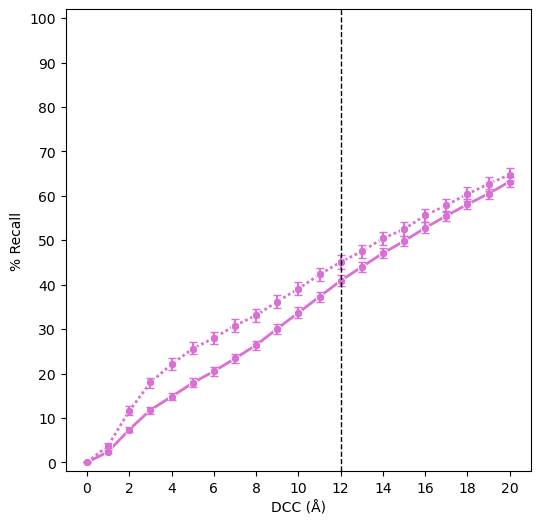

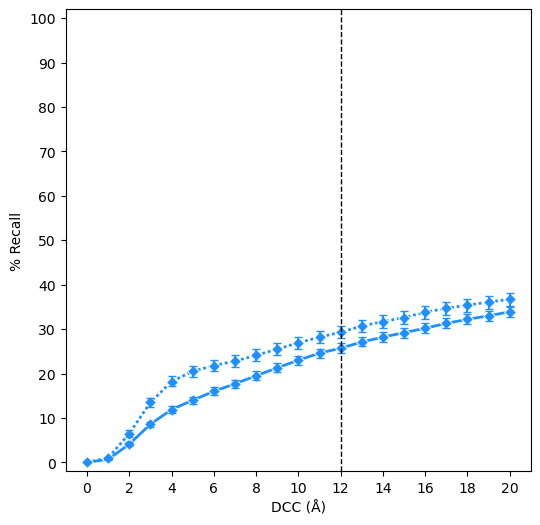

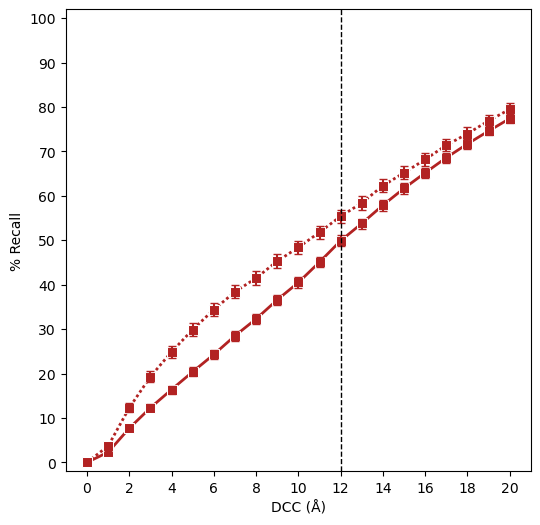

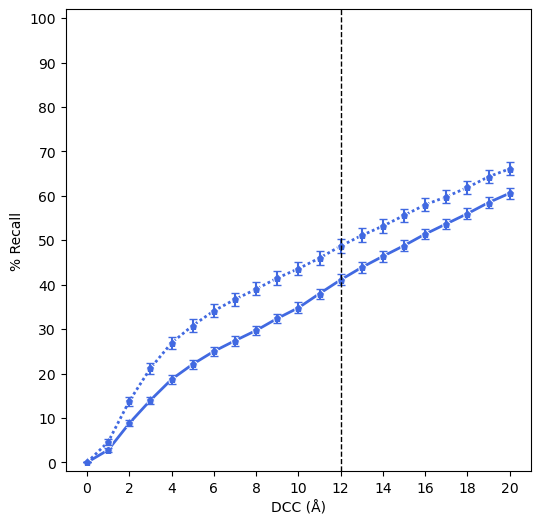

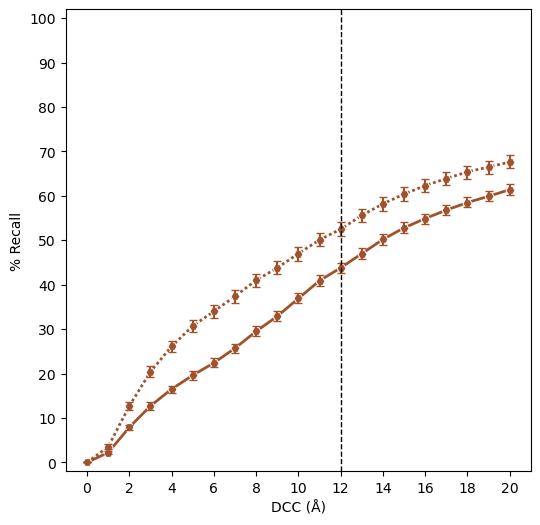

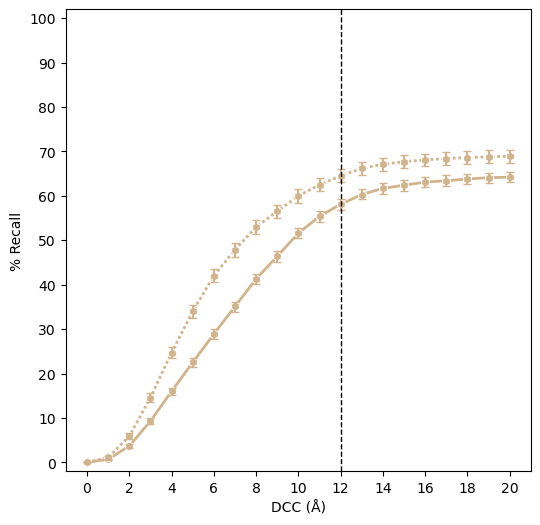

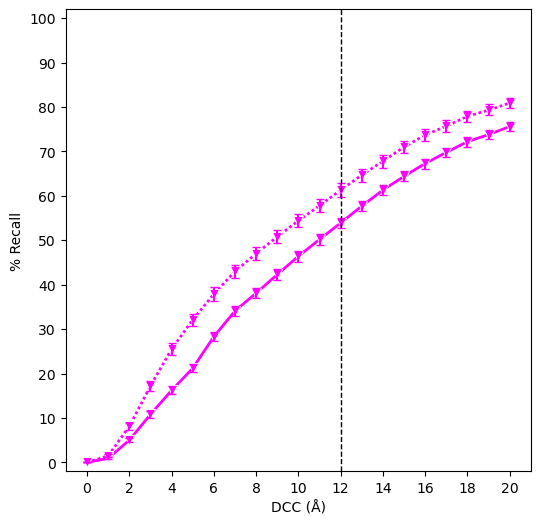

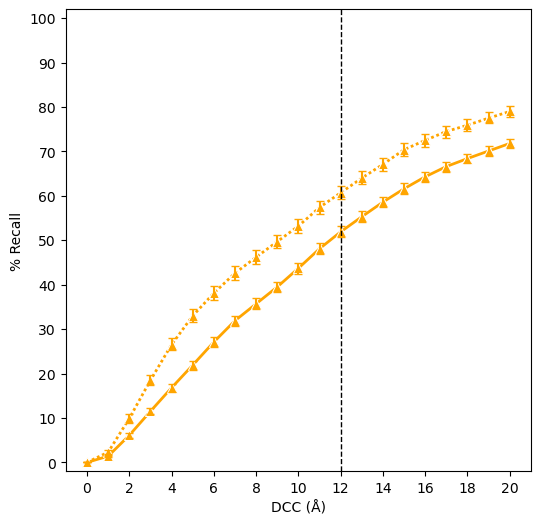

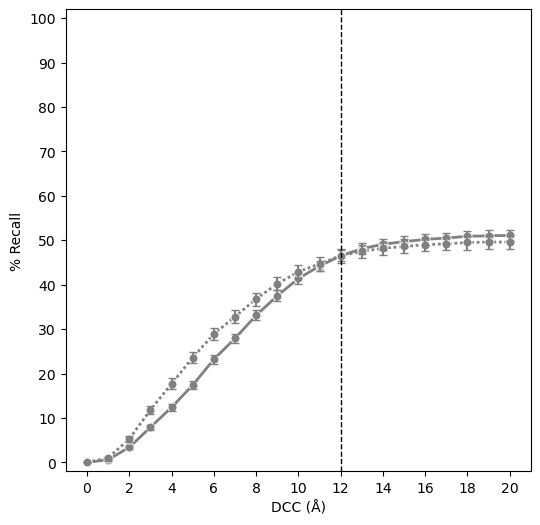

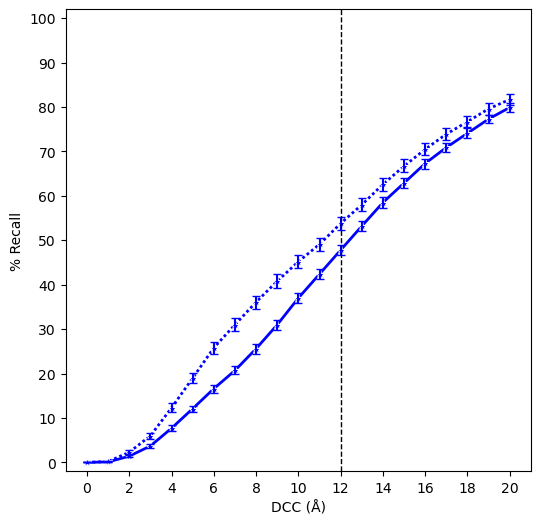

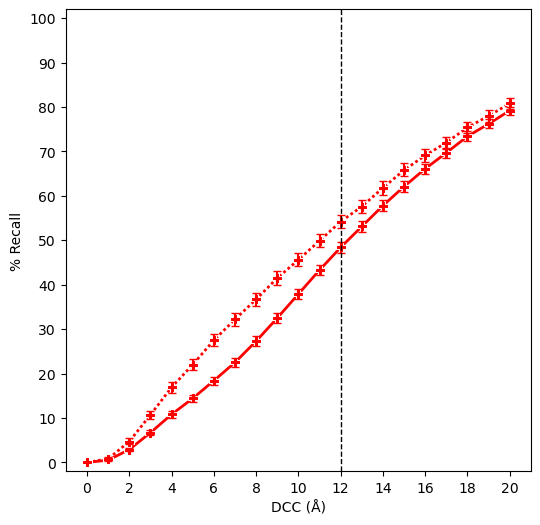

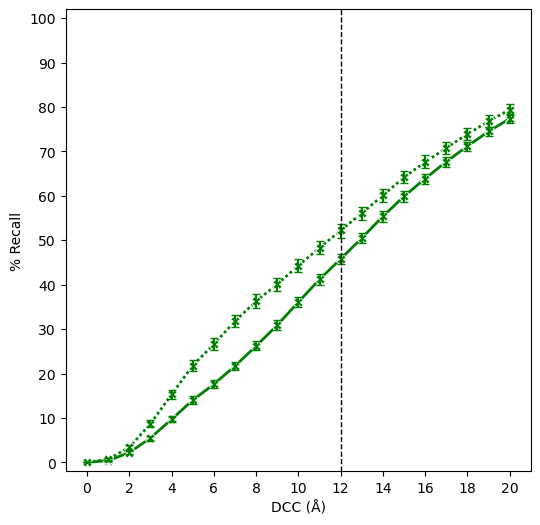

In [95]:
for met in OG_mets:
    plot_results_diff_sets(
        df = comb_ress.query('dist_t not in @dts'), methods = [met],
        fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
        var_col = "dist_t",var_col_label = "DCC (Å)",
        legend_order = OG_mets, ylabel="% Recall", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
        FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
        yticks = np.arange(0, 110, 10), ylim = (-2, 102),
        #out = f'./figs/LIGYSIS_full_VS_ni_{met}.png'
    )

In [67]:
results_best_dist_FULL_COMB["set"] = "LIGYSIS"
#results_best_dist_FULL_COMB_F1["set"] = "F1" (no multimeric sites)"
#results_best_dist_FULL_COMB_F2["set"] = "F2 (no conformational change sites)"
results_best_dist_FULL_COMB_F3["set"] = "LIGYSIS-NI"
#results_best_dist_FULL_COMB_F4["set"] = "LIGYSIS (all filters)"

In [70]:
full_set_results = results_best_dist_FULL_COMB.query('rank_t == 2 & dist_t == 12 & irel_t == 1.05 & origin_pred in @OG_mets').sort_values(by=["success_rate"], ascending = False)
no_ions_set_results = results_best_dist_FULL_COMB_F3.query('rank_t == 2 & dist_t == 12 & irel_t == 1.05 & origin_pred in @OG_mets').sort_values(by=["success_rate"], ascending = False)

In [106]:
results_best_dist_FULL_COMB_F3.query('rank_t == 2 & dist_t == 12 & irel_t == 1.05 & origin_pred in @OG_mets').sort_values(by=["success_rate"], ascending = False)

,origin_pred,rank_t,dist_t,irel_t,success_rate,correct_predictions,total,lower_se,upper_se,set
7304,DeepPocket-Rescored,2,12.0,1.05,0.645,2673,4141,0.631,0.660,LIGYSIS-NI
158312,P2Rank+Cons,2,12.0,1.05,0.613,2539,4141,0.598,0.628,LIGYSIS-NI
146696,P2Rank,2,12.0,1.05,0.607,2515,4141,0.592,0.622,LIGYSIS-NI
42152,GrASP,2,12.0,1.05,0.554,2295,4141,0.539,0.569,LIGYSIS-NI
88616,Ligsite,2,12.0,1.05,0.542,2244,4141,0.527,0.557,LIGYSIS-NI
216392,PocketFinder,2,12.0,1.05,0.538,2228,4141,0.523,0.553,LIGYSIS-NI
18920,DeepPocket-Segmented,2,12.0,1.05,0.525,2175,4141,0.510,0.540,LIGYSIS-NI
274472,Surfnet,2,12.0,1.05,0.522,2160,4141,0.506,0.537,LIGYSIS-NI
169928,PUResNet,2,12.0,1.05,0.487,2015,4141,0.471,0.502,LIGYSIS-NI
355784,fpocket,2,12.0,1.05,0.465,1924,4141,0.449,0.480,LIGYSIS-NI


In [107]:
results_best_dist_FULL_COMB.query('rank_t == 2 & dist_t == 12 & irel_t == 1.05 & origin_pred in @OG_mets').sort_values(by=["success_rate"], ascending = False)

,origin_pred,rank_t,dist_t,irel_t,success_rate,correct_predictions,total,lower_se,upper_se,set
7304,DeepPocket-Rescored,2,12.0,1.05,0.581,3905,6721,0.569,0.593,LIGYSIS
158312,P2Rank+Cons,2,12.0,1.05,0.539,3622,6721,0.527,0.551,LIGYSIS
146696,P2Rank,2,12.0,1.05,0.519,3491,6721,0.507,0.531,LIGYSIS
42152,GrASP,2,12.0,1.05,0.499,3352,6721,0.487,0.511,LIGYSIS
88616,Ligsite,2,12.0,1.05,0.484,3255,6721,0.472,0.496,LIGYSIS
216392,PocketFinder,2,12.0,1.05,0.478,3210,6721,0.466,0.490,LIGYSIS
355784,fpocket,2,12.0,1.05,0.465,3127,6721,0.453,0.477,LIGYSIS
274472,Surfnet,2,12.0,1.05,0.458,3081,6721,0.447,0.470,LIGYSIS
18920,DeepPocket-Segmented,2,12.0,1.05,0.438,2941,6721,0.426,0.449,LIGYSIS
169928,PUResNet,2,12.0,1.05,0.411,2762,6721,0.399,0.423,LIGYSIS
